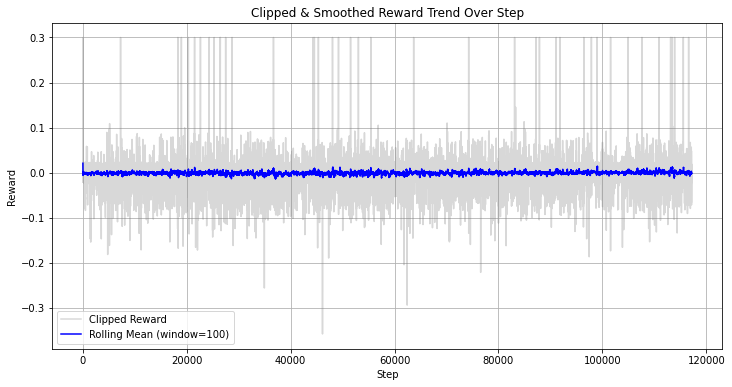

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv("action_reward.csv")

# Create a time index (row numbers as a proxy for time)
df["Step"] = range(len(df))

# Clip rewards to a range (adjust if needed)
reward_min, reward_max = -0.4, 0.3
df["Clipped_Reward"] = np.clip(df["Reward"], reward_min, reward_max)

# Set rolling window size
window_size = 100  # Adjust for smoother/more detailed trends

# Compute rolling average of clipped rewards
df["Rolling_Clipped_Reward"] = df["Clipped_Reward"].rolling(window=window_size, min_periods=1).mean()

# Plot raw and smoothed clipped rewards
plt.figure(figsize=(12, 6))
plt.plot(df["Step"], df["Clipped_Reward"], alpha=0.3, color="gray", label="Clipped Reward")  # Raw clipped rewards
plt.plot(df["Step"], df["Rolling_Clipped_Reward"], label=f"Rolling Mean (window={window_size})", color="b")

# Labels and title
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Clipped & Smoothed Reward Trend Over Step")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
